In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
niners_csvs = os.listdir('Niners_CSVs')
niners_dfs = [pd.read_csv('Niners_CSVs/'+csv) for csv in niners_csvs]
for df in niners_dfs:
    df['Date'] = pd.to_datetime(df['Date'])

In [3]:
len(niners_dfs[0])

714

In [4]:
b_game_1 = niners_dfs[0]

In [5]:
def remove_users_from_df(df, list_users):
    indxs = df[df['User'].isin(list_users)].index
    dfc = df.drop(indxs, inplace=False)
    return dfc

users = b_game_1.groupby(['User']).size().sort_values(ascending=False).head(5)
print(users)
l = list(users.index.values) 
b_game_1_c = remove_users_from_df(b_game_1,l)
b_game_1_c.groupby(['User']).size().sort_values(ascending=False).head(5)

User
49ersSupporters    127
akaDafni            16
xy_RudeLove          7
Spe81558890Lyle      7
kareemslick          6
dtype: int64


User
reactbitcoin      5
JohnARoberts8     5
madesense84       5
TheRealMcKoy85    5
donaldjmock       5
dtype: int64

In [6]:
niners_dfs[0].head()

,Unnamed: 0,ID,Date,User,Tweet,HashTags,Likes,Retweets,MentionUsers,LocationCoordinates,clean_Tweet,NLTK_Sentiment_Analysis,TextBlob_Sentiment_Analysis,Compound_Sentiment_Score,Positive_Sentiment
0,1,1595565615305162757,2022-11-23 23:51:01+00:00,49ersSupporters,Saints Wednesday Injury Report #SanFrancisco49...,"['SanFrancisco49ers', '49ers', 'SF49ers', 'Nin...",0,0,NaN,NaN,saints wednesday injury report,-0.4215,0.000000,-0.421500,False
1,2,1595564857117802497,2022-11-23 23:48:00+00:00,49ersSupporters,Fantasy Football Week 12: Tight End rankings #...,"['SanFrancisco49ers', '49ers', 'SF49ers', 'Nin...",0,0,NaN,NaN,fantasy football week 12 tight end rankings,0.0000,-0.178571,-0.178571,False
2,3,1595563094897348608,2022-11-23 23:41:00+00:00,49ersSupporters,Why not 49ers vs. Cowboys on Thanksgiving? It'...,"['SanFrancisco49ers', '49ers', 'SF49ers', 'Nin...",0,0,NaN,NaN,49ers vs cowboys thanksgiving complicated,0.0000,-0.500000,-0.500000,False
3,4,1595562087648043008,2022-11-23 23:37:00+00:00,49ersSupporters,Saints can help save their season with a win a...,"['SanFrancisco49ers', '49ers', 'SF49ers', 'Nin...",0,0,NaN,NaN,saints help save season win one oldest rivals,0.8658,0.800000,1.665800,True
4,5,1595560578919301120,2022-11-23 23:31:00+00:00,49ersSupporters,San Francisco 49ers defeat Arizona Cardinals i...,"['SanFrancisco49ers', '49ers', 'SF49ers', 'Nin...",0,0,NaN,NaN,san francisco 49ers defeat arizona cardinals m...,-0.4588,0.000000,-0.458800,False


In [7]:
def make_scatter_and_pie_figure(df,fig_name,save=False):
    fig, axes = plt.subplots(2, 1, figsize=(15, 10))
    sns.set_style('whitegrid')
    sns.scatterplot(ax=axes[0],x=df['Date'],y=df["Compound_Sentiment_Score"],hue=df['Positive_Sentiment'])
    axes[0].set_title('Positive and Negative Sentiment Scores over Time Scatter Plot',fontsize=12)
    true = len(df.loc[(df['Positive_Sentiment']==True)])
    false = len(df.loc[(df['Positive_Sentiment']==False)])
    axes[1].pie([false,true],labels=["Negative",'Positive'])
    axes[1].set_title('Pie Plot of Sentiment Labels',fontsize=12)
    fig.suptitle(fig_name, fontsize=20)
    if save:
        plt.savefig(fig_name)

In [8]:
niners_csvs

['Niners_Game10_Cardinals.csv',
 'Niners_Game11_Saints.csv',
 'Niners_Game1_Bears.csv',
 'Niners_Game2_Seahawks.csv',
 'Niners_Game3_Broncos.csv',
 'Niners_Game4_Rams.csv',
 'Niners_Game5_Panthers.csv',
 'Niners_Game6_Falcons.csv',
 'Niners_Game7_Chiefs.csv',
 'Niners_Game8_Rams.csv',
 'Niners_Game9_Chargers.csv']

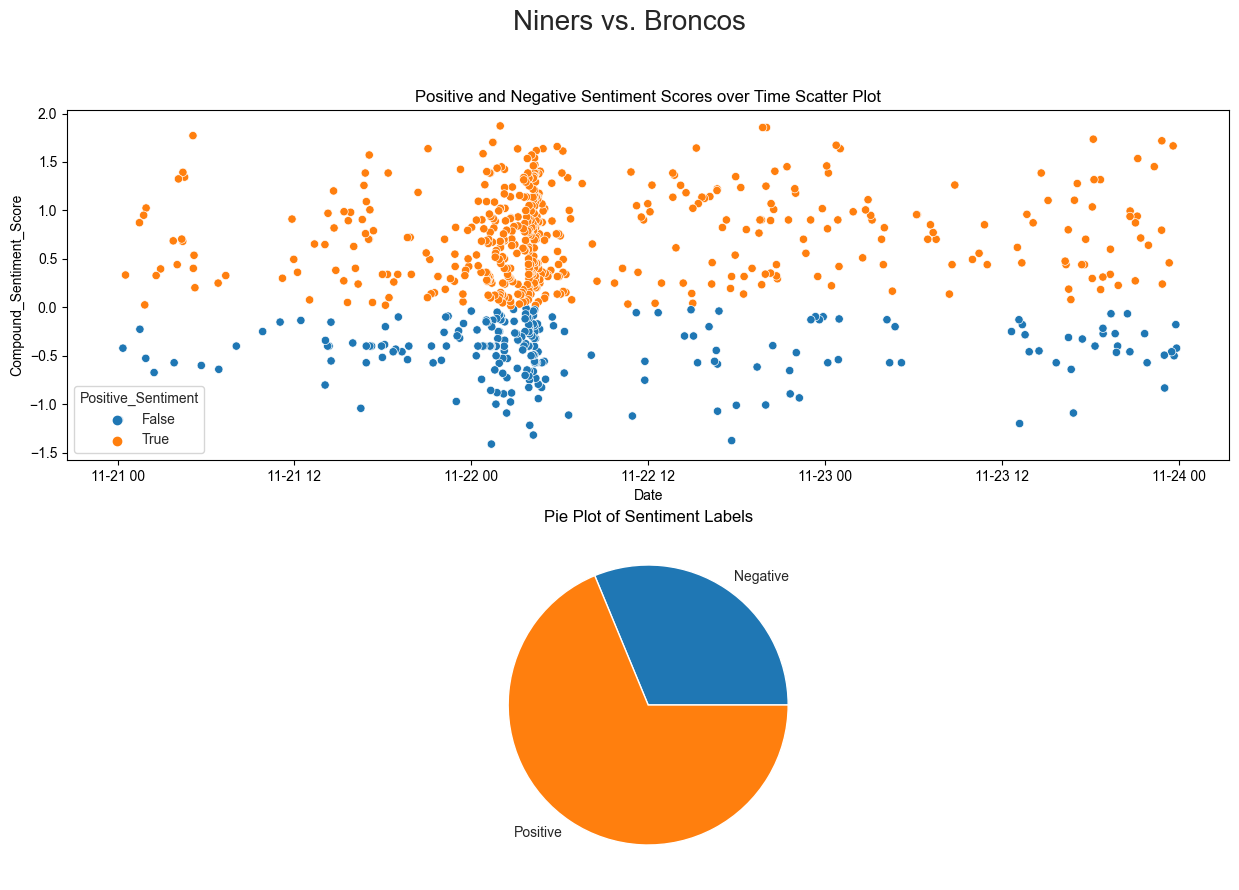

In [9]:
make_scatter_and_pie_figure(niners_dfs[0], 'Niners vs. Broncos')

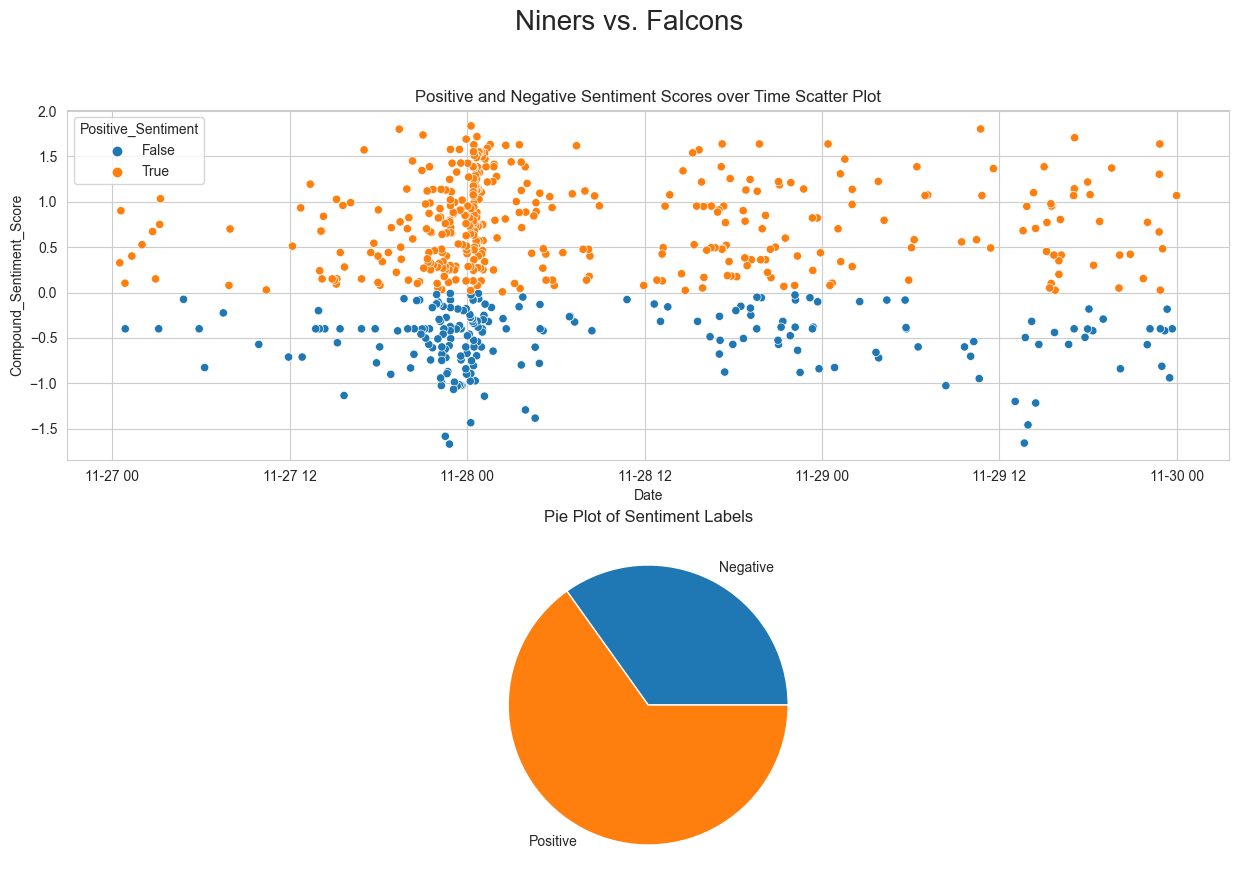

In [10]:
make_scatter_and_pie_figure(niners_dfs[1], 'Niners vs. Falcons')

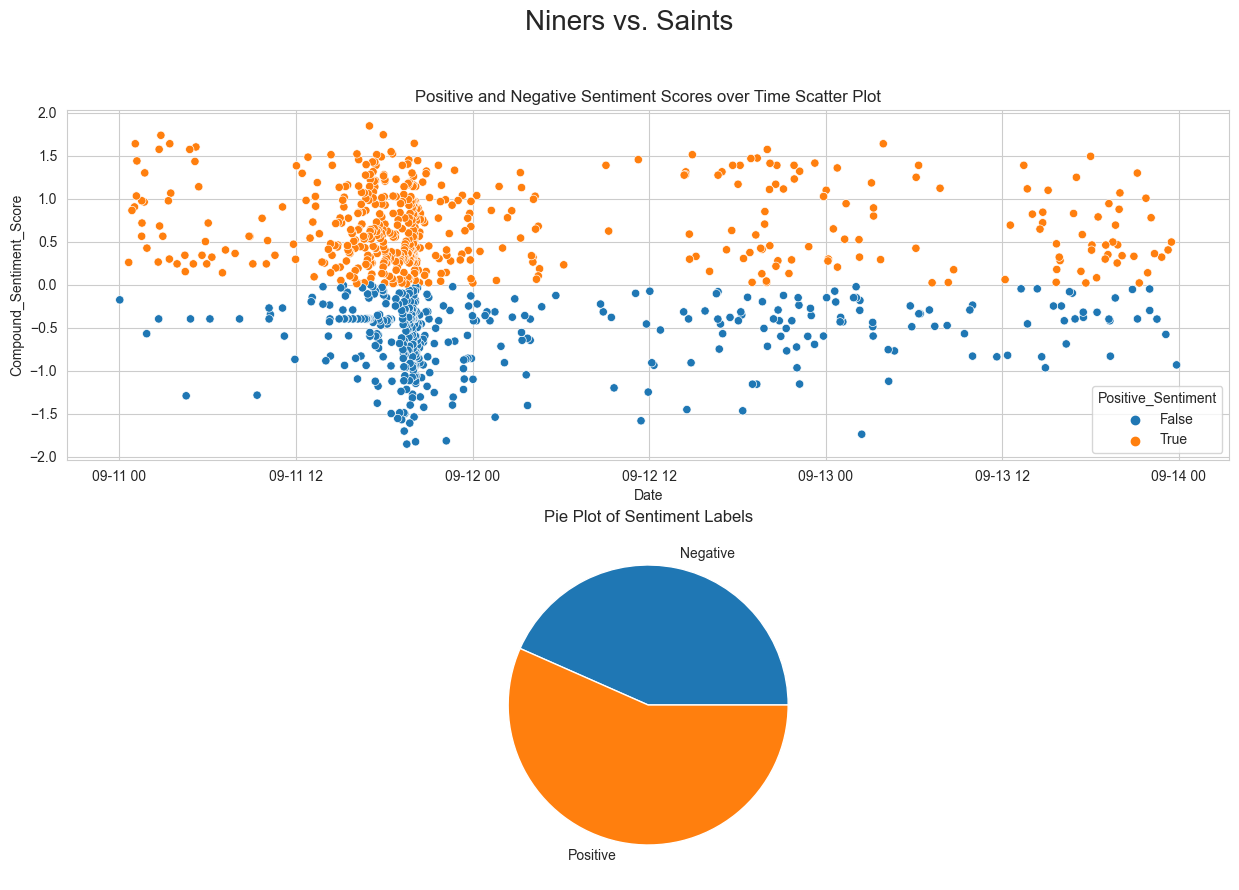

In [11]:
make_scatter_and_pie_figure(niners_dfs[2], 'Niners vs. Saints')

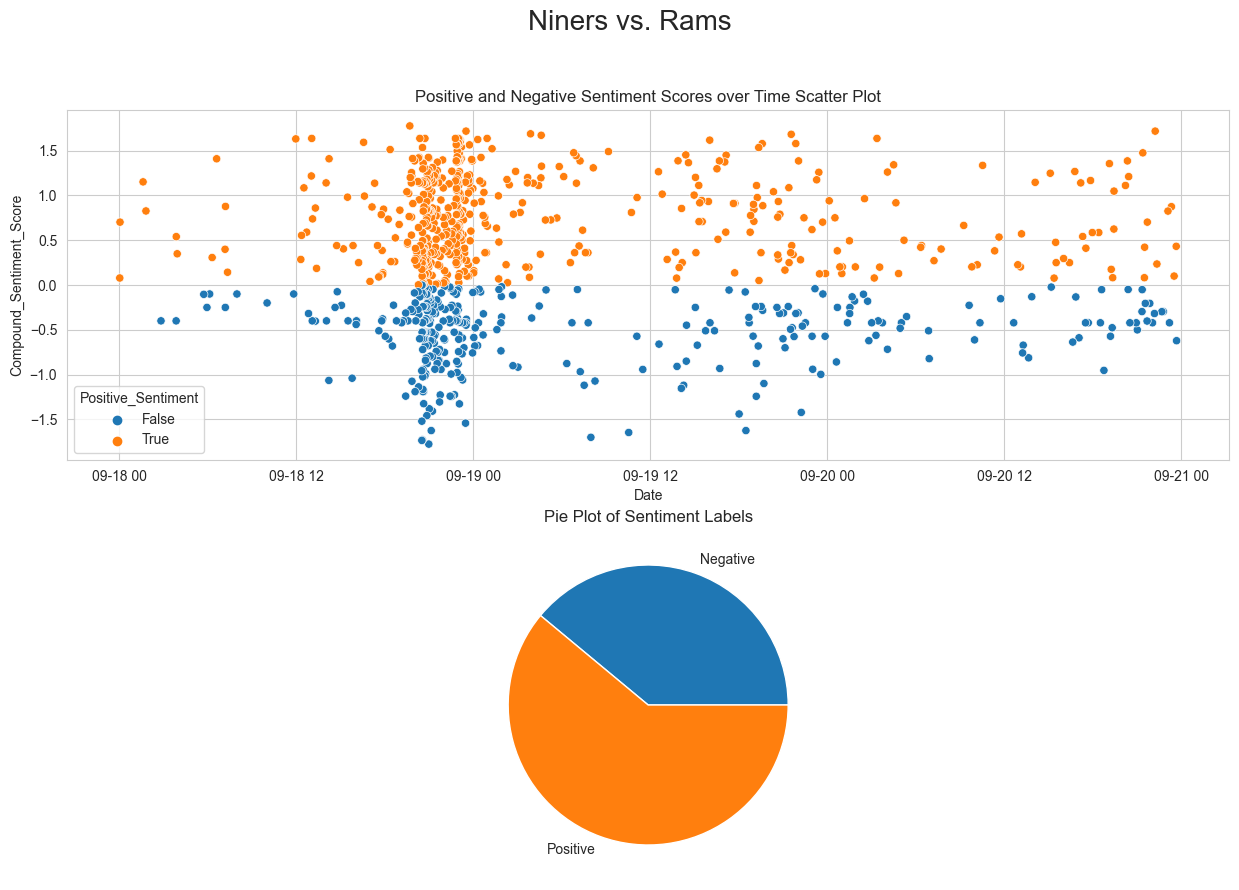

In [12]:
make_scatter_and_pie_figure(niners_dfs[3], 'Niners vs. Rams')

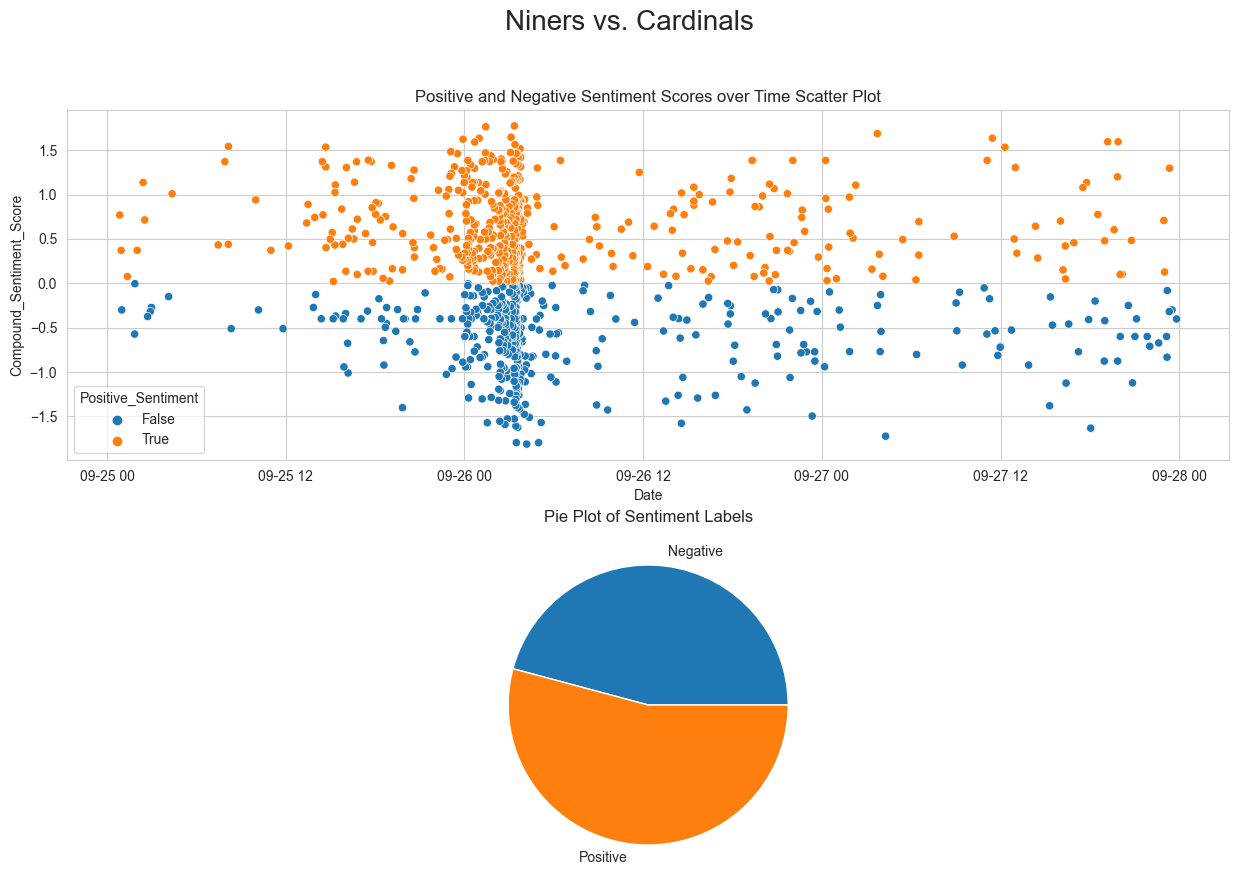

In [13]:
make_scatter_and_pie_figure(niners_dfs[4], 'Niners vs. Cardinals')

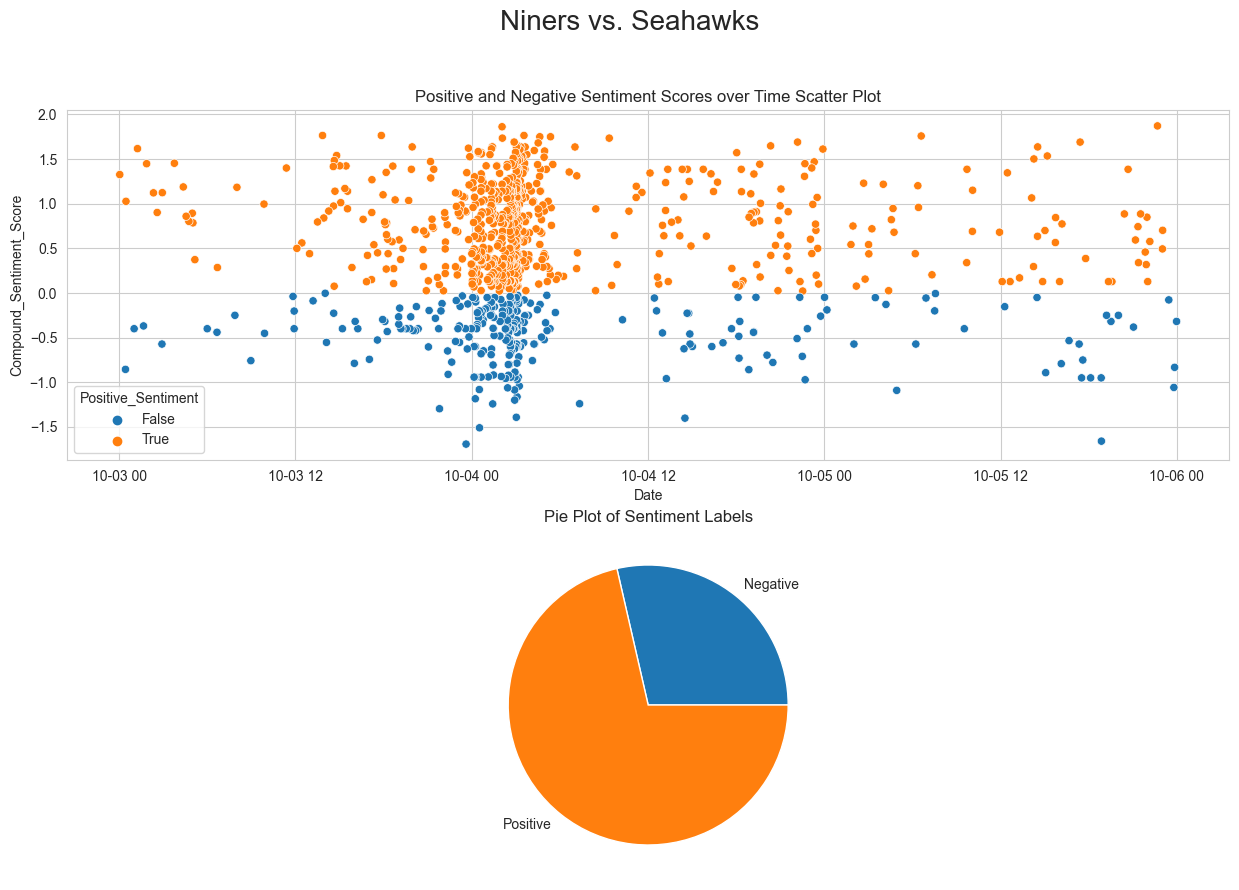

In [14]:
make_scatter_and_pie_figure(niners_dfs[5], 'Niners vs. Seahawks')

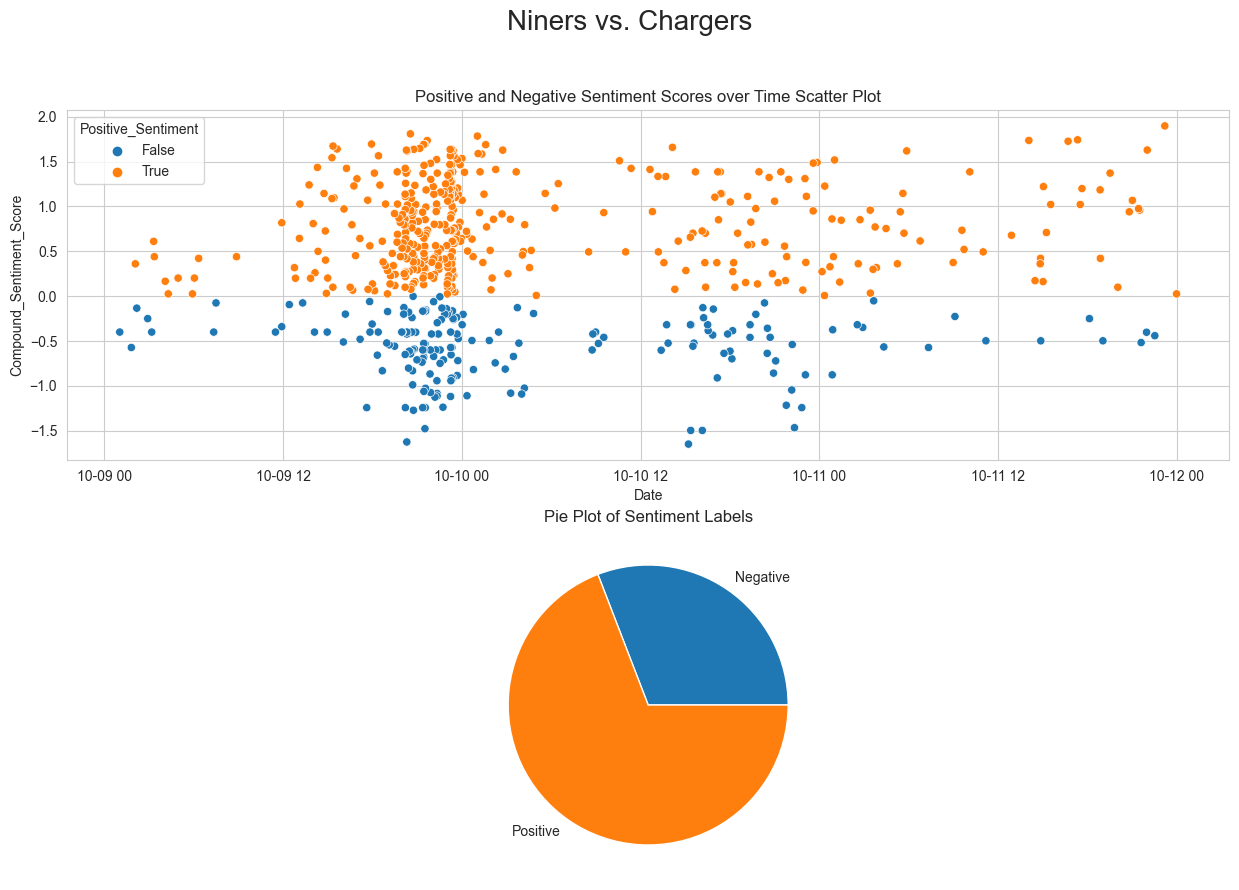

In [15]:
make_scatter_and_pie_figure(niners_dfs[6], 'Niners vs. Chargers')

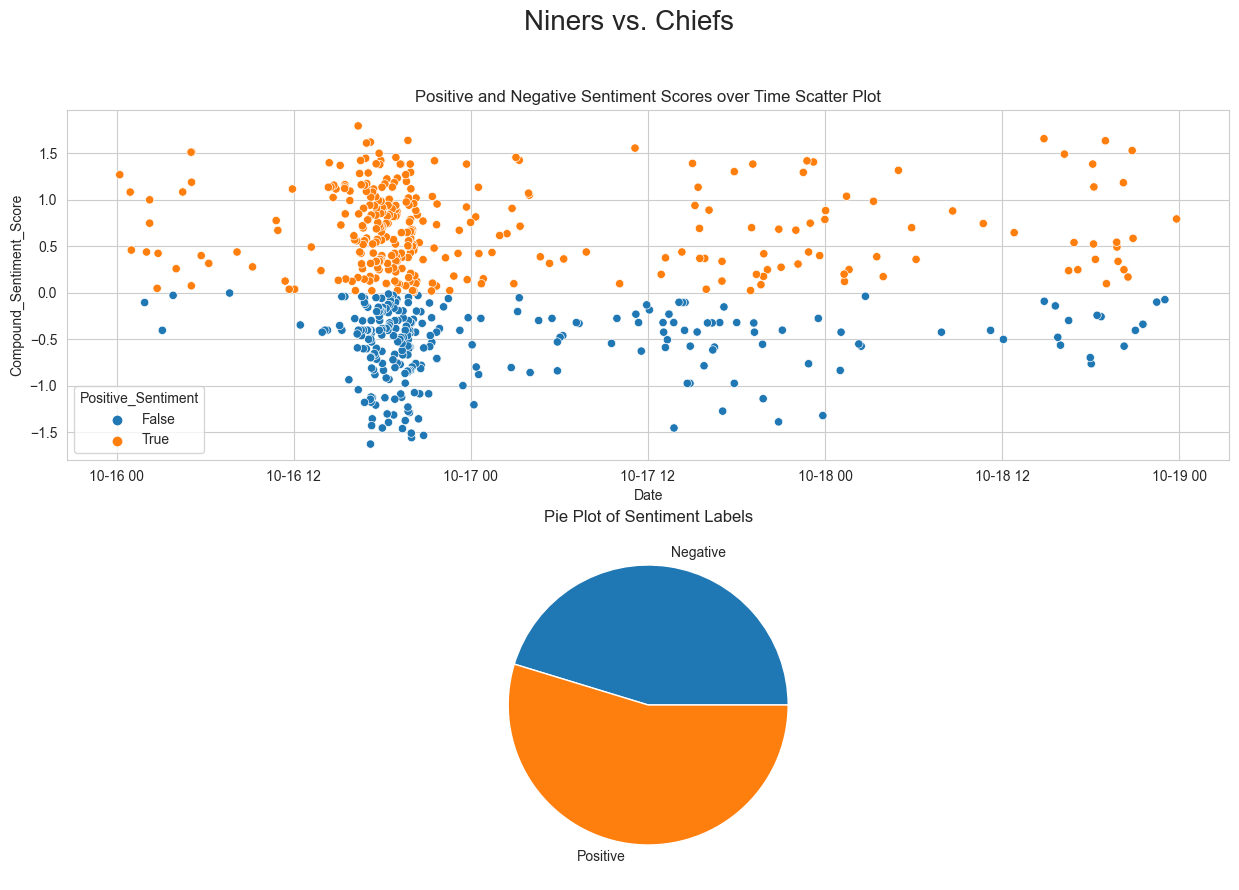

In [16]:
make_scatter_and_pie_figure(niners_dfs[7], 'Niners vs. Chiefs')

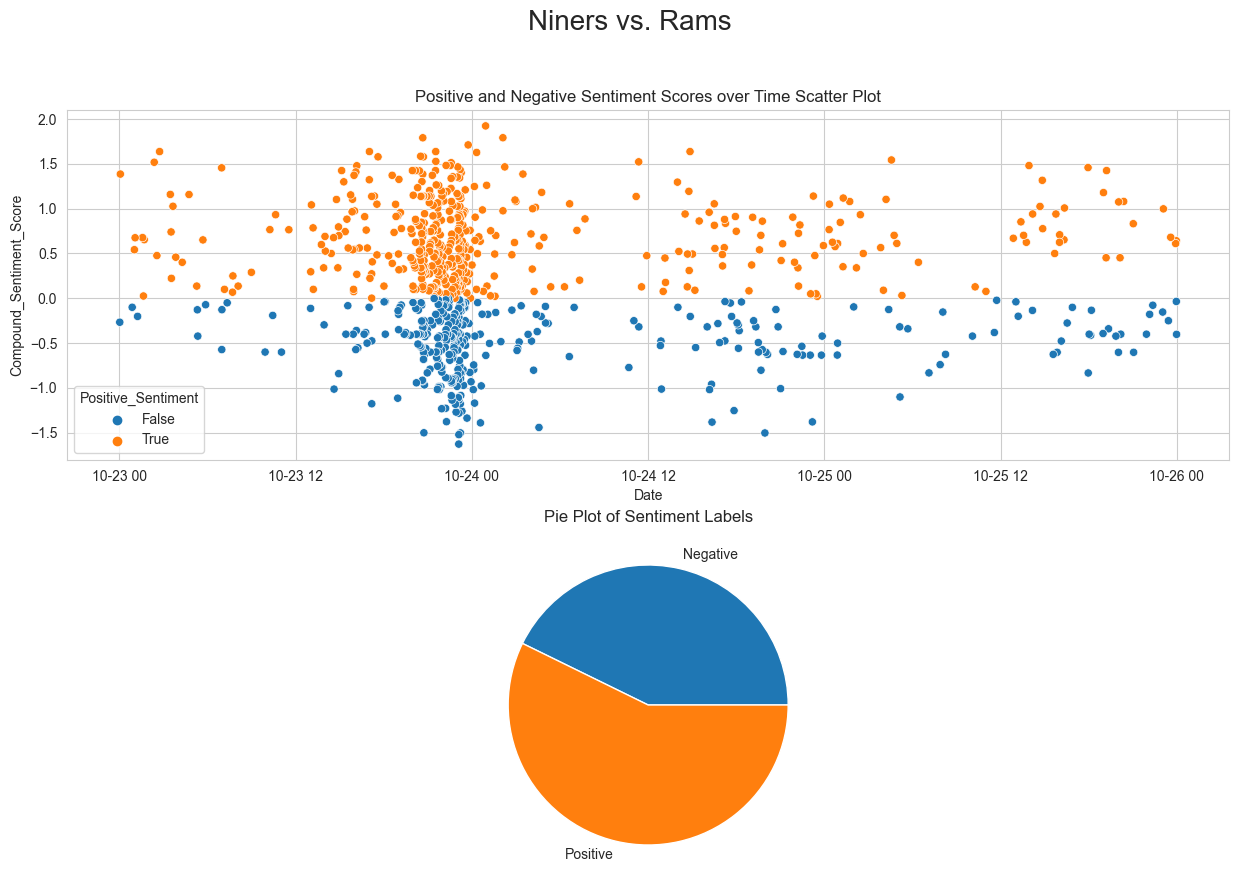

In [17]:
make_scatter_and_pie_figure(niners_dfs[8], 'Niners vs. Rams')

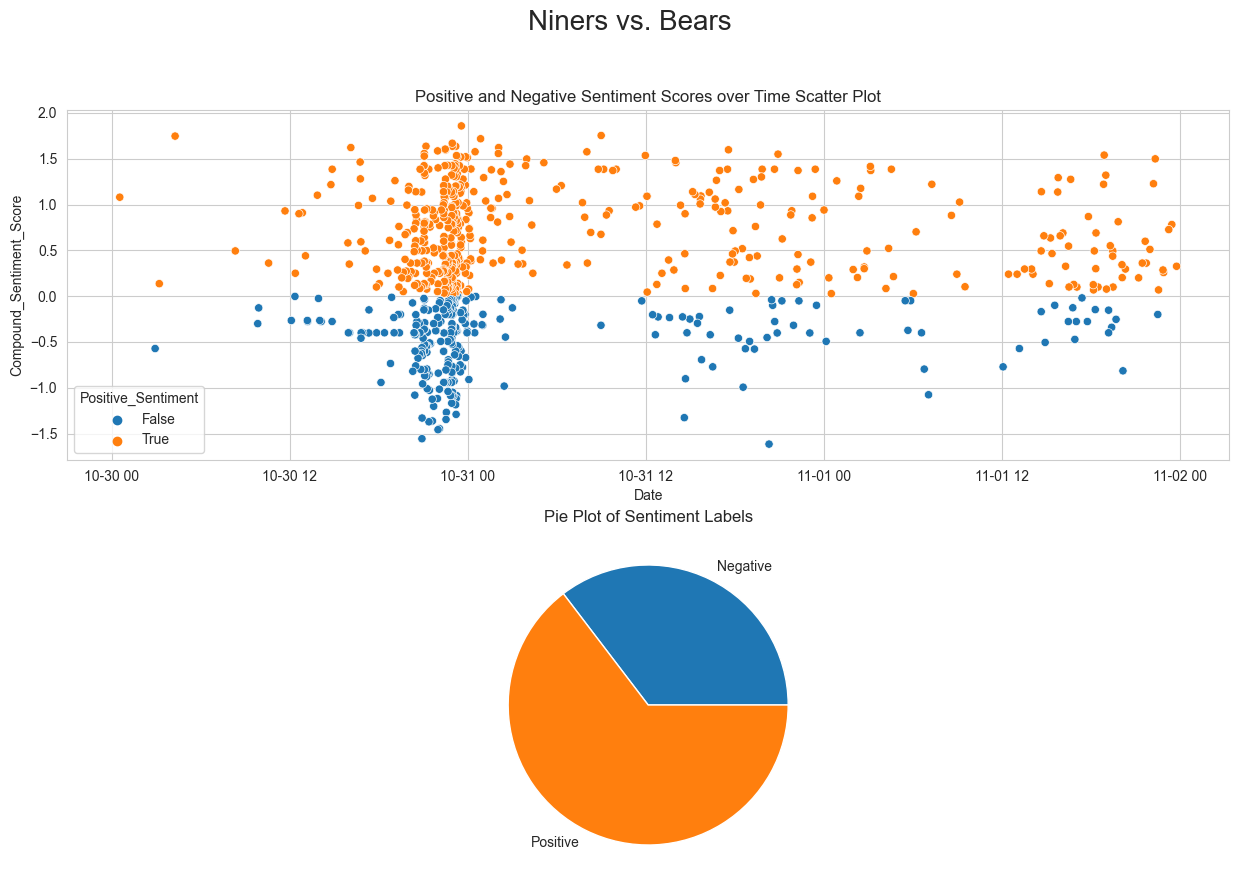

In [18]:
make_scatter_and_pie_figure(niners_dfs[9], 'Niners vs. Bears')

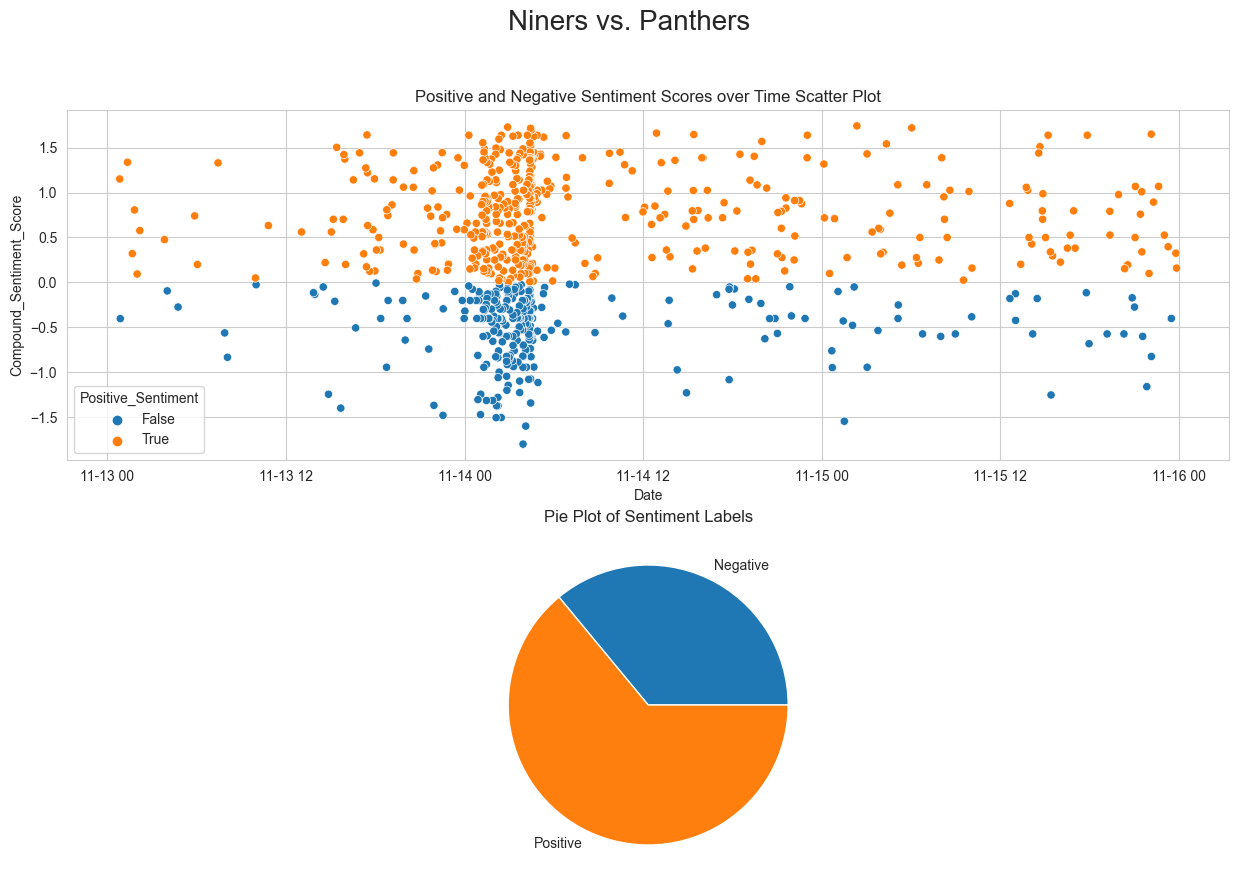

In [19]:
make_scatter_and_pie_figure(niners_dfs[10], 'Niners vs. Panthers')